In [52]:
import os
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [53]:
df_cleaned = pd.read_csv("../Data/CleanedData.csv")

In [54]:
df_cleaned = df_cleaned.drop(columns=["Unnamed: 0"])
df_cleaned

,CPI,Unemployment Rate,Fed Funds Rate,M2 Money Supply,day_diff
0,169.300,4.0,5.45,4667.6,-1.792515
1,169.300,4.0,5.45,4667.6,-2.409937
2,169.300,4.0,5.45,4667.6,0.039834
3,169.300,4.0,5.45,4667.6,-1.195010
4,169.300,4.0,5.45,4667.6,3.465529
...,...,...,...,...,...
6304,317.685,4.1,4.48,21533.8,4.559998
6305,317.685,4.1,4.48,21533.8,3.900024
6306,317.685,4.1,4.48,21533.8,-1.909973
6307,317.685,4.1,4.48,21533.8,1.079956


In [55]:
X = df_cleaned.drop(columns=['day_diff'])
y = df_cleaned['day_diff']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42)

In [56]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(
    64, input_dim=X_train.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

/Users/andrew/Desktop/Projects/MarketPredictor/env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0788 - val_loss: 0.8956
Epoch 2/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.9760 - val_loss: 0.8893
Epoch 3/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 1.0569 - val_loss: 0.8843
Epoch 4/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.9799 - val_loss: 0.8855
Epoch 5/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 1.0733 - val_loss: 0.8938
Epoch 6/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 1.0475 - val_loss: 0.8868
Epoch 7/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 1.1728 - val_loss: 0.8859
Epoch 8/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.9844 - val_loss: 0.8837
Epoch 9/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.9943 - val_loss: 0.8816
Epoch 10/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 1.0248 - val_loss: 0.8880
Epoch 11/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 1.0516 - val_loss: 0.8876
Epoch 12/100
158/158 

In [58]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 0.8214
Test Loss: 0.9075819253921509


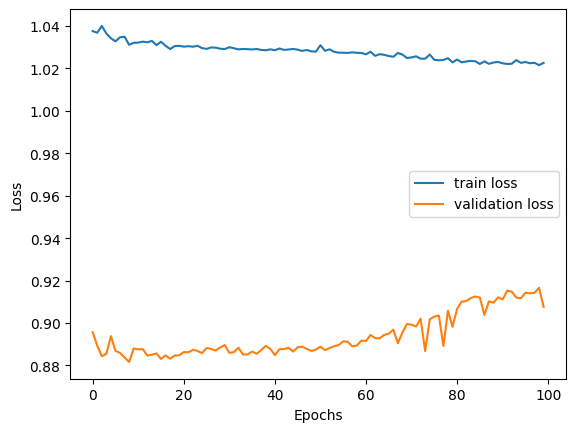

In [59]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
predictions = model.predict(X_test)

print(predictions[:5])
print(y_test[:5])

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step
[[-0.09252483]
 [-0.01229674]
 [-0.01686537]
 [-0.03443898]
 [-0.08968941]]
[ 0.08035845 -0.64138805  0.34395367 -0.10293707 -1.56222454]
